<a href="https://colab.research.google.com/github/JARAM2021/NLP_Study/blob/nykim/week1/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,583 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160975 files and d

# 과제 1 : Tokenizing
- Nltk 말뭉치 혹은 직접 모은 txt파일을 단어 단위로 분리하여 txt파일에 저장하기
- 한국어의 경우 교착어이기 때문에 단어 토큰화는 지양 됨. 따라서 **morpheme tokenize**를 진행

# 과제 2 : Tagging
- 단어 단위로 분리한 토큰에 품사를 표시하여 txt파일에 저장하기
- 과제 1에서 언급한 것처럼 morpheme tokenizing을 진행하면서 같이 품사 표시

# 과제 3 : Extract Noun
- 명사만 추출하여 txt파일에 저장하기
- `NP`, `NNP`, `NNG`, `NNB` 가 명사 종류이므로 해당 morpheme에 대해서만 word 저장

## 라이브러리 설치
- Khaiii 설치

In [1]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

fatal: destination path 'khaiii' already exists and is not an empty directory.
mkdir: cannot create directory ‘build’: File exists
-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunte

## Google Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
cd /content/gdrive/My Drive/Colab Notebooks/2021_NLP_STUDY

/content/gdrive/My Drive/Colab Notebooks/2021_NLP_STUDY


In [4]:
ls

week1_data/  week1.ipynb


## 데이터 import

In [5]:
with open('./week1_data/news_data.txt', 'r', encoding='utf-8') as f :
    data = f.readlines()
    data = ' '.join(data)
    data = data.replace('\n', '')
    data = data.split('. ')
data

['변창흠 국토교통부 장관이 한국토지주택공사 직원들의 광명·시흥 새도시 사전 투기 의혹에 대해 ‘새도시 지정을 염두에 둔 투기는 아닐 것’이라는 취지로 두둔하는 듯한 발언을 해 논란이 일고 있다',
 '수억원대 대출을 끌어다 농지를 사고, 겨울철에 묘목을 심는 등 전형적인 투기 수법이 드러난 가운데 주무부처 장관이 안이한 인식을 하고 있는 게 아니냐는 지적이 나온다',
 ' 문화방송(MBC)은 지난 4일 <뉴스데스크>를 통해 보도한 기사 “개발정보 알고 산 거 아니다…장관이 나서서 감싸기?”에서 변 장관이 “개발 정보를 알고 땅을 미리 산 것은 아닌 것 같다',
 '신도시 개발이 안 될 것으로 알고 샀는데 갑자기 신도시로 지정된 것 아닌가 생각한다”고 말했다고 밝혔다',
 '또 변 장관이 “전면 수용되는 신도시에 땅을 사는 건 바보짓이다”, “(토지) 수용은 감정가로 매입하니 메리트가 없다”, “2025년 이후 민간 개발될 걸로 알고 땅을 샀을 가능성이 높다고 생각한다”는 등의 말을 했다고도 보도했다',
 ' 주무부처 장관이 사실상 이들이 광명·시흥 새도시의 토지를 매입한 행위가 개발 정보를 미리 알고 산 ‘위법행위’가 아닐 수 있다는 의견을 가지고 있는 사실이 드러난 셈이다',
 '변 장관이 해당 발언을 한 날은 기자회견을 자처해 “책임을 통감한다”며 사과를 한 날이다',
 '더구나 이번에 사전투기 의혹이 제기된 직원들이 토지를 매입한 시기는 변 장관이 엘에이치 사장으로 재임할 당시에 집중돼 있어 ‘책임론’까지 나오고 있는 상황이다',
 ' 이같은 인식은 문제가 된 엘에이치 직원들이 수십억원대 대출을 받아서 토지를 매입한 점, 지분쪼개기나 겨울철에 묘목을 심는 등 개발 대상 토지에서 이뤄지는 전형적인 투기 수법을 보이고 있는 점 등이 사회적 공분을 부르고 있는 상황과 큰 괴리를 보인다',
 ' 한 토지투자 전문가는 “임야나 도로라면 모를까 전답은 농사를 짓는 목적으로 매입할 수 있기 때문에 지분거래가 일반적인 형태는 아니다”라고 말했다',
 ' 논란이 커지자

## Tokenizing, Tagging, Extracting Noun

In [16]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

# morpheme tokenizing -only word
words = []
# morphemes
morphemes = []
# nouns
nouns = []

for sent in data :
    for word in api.analyze(sent) :
        for morph in word.morphs :
            words.append(morph.lex)
            morphemes.append(morph.lex + '/' + morph.tag)

            if morph.tag == 'NP' or morph.tag == 'NNP' or morph.tag == 'NNG' or morph.tag == 'NNB' :
                nouns.append(morph.lex + '/' + morph.tag)


In [17]:
from pprint import pprint

pprint(words)
pprint(morphemes)
pprint(nouns)



['변창흠',
 '국토',
 '교',
 '통부',
 '장관',
 '이',
 '한국토지주택',
 '공사',
 '직원',
 '들',
 '의',
 '광명',
 '·',
 '시흥',
 '새',
 '도',
 '시',
 '사전',
 '투기',
 '의혹',
 '에',
 '대하',
 '여',
 '‘',
 '새',
 '도시',
 '지정',
 '을',
 '염두',
 '에',
 '두',
 'ㄴ',
 '투기',
 '는',
 '아니',
 'ㄹ',
 '것',
 '’',
 '이',
 '라는',
 '취지',
 '로',
 '두둔',
 '하',
 '는',
 '듯',
 '하',
 'ㄴ',
 '발언',
 '을',
 '하',
 '여',
 '논란',
 '이',
 '일',
 '고',
 '있',
 '다',
 '수억',
 '원',
 '대',
 '대출',
 '을',
 '끌',
 '어다',
 '농지',
 '를',
 '사',
 '고',
 ',',
 '겨울철',
 '에',
 '묘목',
 '을',
 '심',
 '는',
 '등',
 '전형',
 '적',
 '이',
 'ㄴ',
 '투기',
 '수법',
 '이',
 '드러나',
 'ㄴ',
 '가운데',
 '주무',
 '부처',
 '장관',
 '이',
 '안이',
 '하',
 'ㄴ',
 '인식',
 '을',
 '하',
 '고',
 '있',
 '는',
 '것',
 '이',
 '아니',
 '냐는',
 '지적',
 '이',
 '나오',
 'ㄴ다',
 '문화방송',
 '(',
 'MBC',
 ')',
 '은',
 '지나',
 'ㄴ',
 '4',
 '일',
 '<',
 '뉴스데',
 '스크',
 '>',
 '를',
 '통하',
 '여',
 '보도',
 '하',
 'ㄴ',
 '기사',
 '“',
 '개발',
 '정보',
 '알',
 '고',
 '사',
 'ㄴ',
 '거',
 '아니',
 '다',
 '…',
 '장관',
 '이',
 '나서',
 '어서',
 '감싸',
 '기',
 '?',
 '”',
 '에서',
 '변',
 '장관',
 '이',
 '“',
 '개발',
 '정보',
 

In [18]:
def filesave(path, obj):
    outfile = open(path, 'w')
    outfile.write(str(obj))
    outfile.close()

filesave('./week1_data/words.txt', words)
filesave('./week1_data/morphemes.txt', morphemes)
filesave('./week1_data/nouns.txt', nouns)

# 과제 4 : 빈도가 높은 단어 20개를 그래프로 그리기
- Y축은 단어가 나타난 횟수, X축은 빈도가 높은 단어

In [9]:
!pip install pandas
!pip install matplotlib

In [10]:
from pandas import DataFrame as df

dataframe = df(data={'words' : words, 'morphemes' : morphemes})
dataframe

,words,morphemes
0,변창흠,변창흠/NNP
1,국토,국토/NNG
2,교,교/NNG
3,통부,통부/NNG
4,장관,장관/NNG
...,...,...
762,도,도/JX
763,하,하/VX
764,였,였/EP
765,다,다/EF


In [11]:
df1 = df(dataframe['words'].value_counts())
df1

,words
이,39
하,38
ㄴ,30
는,24
을,20
...,...
불가피,1
년,1
및,1
사장,1


In [12]:
df2 = df1.reset_index()
df2

,index,words
0,이,39
1,하,38
2,ㄴ,30
3,는,24
4,을,20
...,...,...
277,불가피,1
278,년,1
279,및,1
280,사장,1


In [13]:
df2['index'][:20]

0      이
1      하
2      ㄴ
3      는
4      을
5      를
6      다
7      고
8      에
9      은
10    장관
11     “
12     있
13     ”
14     되
15     ㄹ
16     것
17    투기
18     의
19    토지
Name: index, dtype: object

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# font_path = r'C:\Users\user\NanumBarunGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)

plt.rc('font', family='NanumBarunGothic')

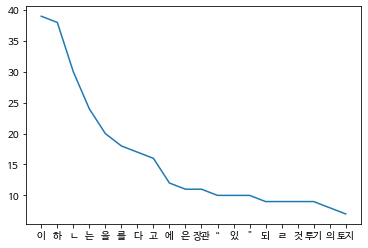

In [15]:
X = df2['index'][:20]
Y = df2['words'][:20]

plt.plot(X, Y)
plt.show()

In [19]:
dataframe2 = df(data={'nouns' : nouns})
dataframe2

,nouns
0,변창흠/NNP
1,국토/NNG
2,교/NNG
3,통부/NNG
4,장관/NNG
...,...
277,작성/NNG
278,모습/NNG
279,촬영/NNG
280,사진/NNG


In [22]:
df3 = df(dataframe2['nouns'].value_counts())
df4 = df3.reset_index()
df4

,index,nouns
0,장관/NNG,11
1,투기/NNG,9
2,것/NNB,9
3,토지/NNG,7
4,변/NNG,7
...,...,...
153,설명/NNG,1
154,단체/NNG,1
155,개선/NNG,1
156,국토/NNG,1


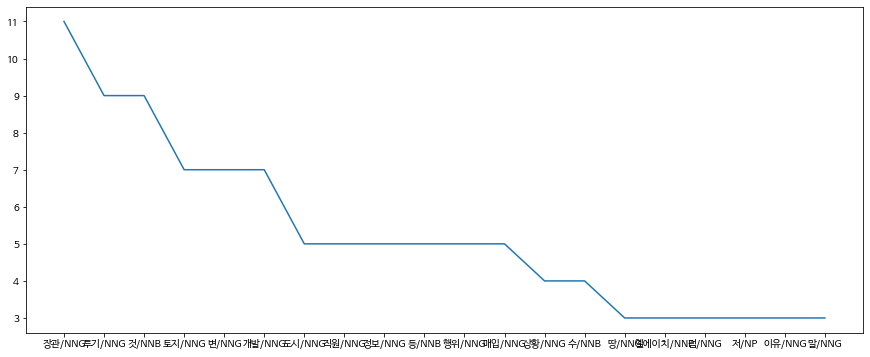

In [28]:
X = df4['index'][:20]
Y = df4['nouns'][:20]
plt.figure(figsize=(15, 6))
plt.plot(X, Y)
plt.show()